In [1]:
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [14]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [15]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with = engine)

In [16]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [171]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [173]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [21]:
# Find the most recent date in the data set.
most_recent_date  = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date


('2017-08-23',)

In [234]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 


# most_recent_date  =('2017-08-23',) from above step

# Calculate the date one year from the last date in data set.

# A year is 365 days: Therfore, one year from the most_recent_date will be (2016, 8, 23) 
#as calculated below (one_year_from_most_recent_date)

one_year_from_most_recent_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores. Note the sorting is also done within this step
prcp_cleaned = []  # List to hold cleaned (with no empty or none value prcp values)
date_cleaned = [] # list to hold the corresponding date for the prcp_cleaned values
Date_and_prcp = session.query(Measurement.date,Measurement.prcp).\
      filter(Measurement.date >= one_year_from_most_recent_date).\
      order_by(Measurement.date.desc()).all()
# The for loop is for cleaning the empty or 'none prcp values and the corresponding dates'
for i in Date_and_prcp:
    if type(i[1])==float: #This ensures no empty or none values are considered
        prcp_cleaned.append(i[1]) # Row 1 of the list for the prcp values
        date_cleaned.append(i[0]) #row 0 of the list for the date


# # Save the query results as a Pandas DataFrame and set the index to the date column
df =pd.DataFrame({'date':date_cleaned,'prcp':prcp_cleaned })
# Use Pandas Plotting with Matplotlib to plot the data
df.head() #sorted in descending order

,date,prcp
0,2017-08-23,0.00
1,2017-08-23,0.00
2,2017-08-23,0.08
3,2017-08-23,0.45
4,2017-08-22,0.00


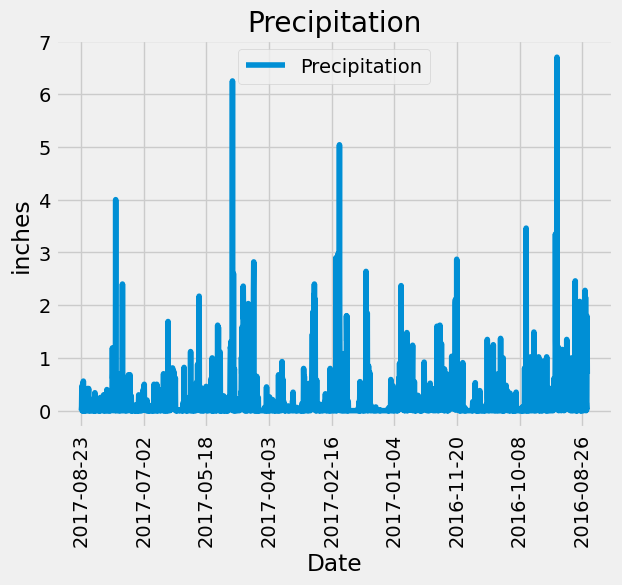

In [236]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot('date', 'prcp', rot = 'vertical')
plt.xlabel("Date")
plt.ylabel("Inches")
plt.title("Precipitation")
plt.legend(["Precipitation"], loc='upper center')
plt.show()

In [196]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_mean= df.groupby("date")["prcp"].mean()
prcp_median =df.groupby("date")["prcp"].median()
prcp_variance = df.groupby("date")["prcp"].var()
prcp_std = df.groupby("date")["prcp"].std()
prcp_sem = df.groupby("date")["prcp"].sem()

Summary_Table_Statistics = pd.DataFrame({"Mean_prcp":prcp_mean,"Median_prcp":prcp_median,"Variance_prcp":prcp_variance
                                        , "std_prcp":prcp_std, "prcp_Std. Err.":prcp_sem})
Summary_Table_Statistics.head() # This is for the daily summary table


,Mean_prcp,Median_prcp,Variance_prcp,std_prcp,prcp_Std. Err.
date,,,,,
2016-08-23,0.451667,0.100,0.499097,0.706468,0.288414
2016-08-24,1.555000,1.800,0.706510,0.840541,0.343150
2016-08-25,0.077143,0.080,0.005157,0.071813,0.027143
2016-08-26,0.016667,0.015,0.000267,0.016330,0.006667
2016-08-27,0.064000,0.020,0.006680,0.081731,0.036551


In [197]:
# Since the question was vague, I also created for the year summary using the discribe()
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [241]:
# Design a query to calculate the total number stations in the dataset
Total_Stations = session.query(func.count(Station.name)).all()


In [242]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active_stations = session.query(Measurement.station,func.count(Measurement.id)).\
group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).all()
       

sel

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [243]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).all()

[(53.0, 87.0, 73.09795396419437)]

In [249]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
max_temp_obs = session.query(Measurement.station, Measurement.tobs).filter(Measurement.date >= '2016-08-23').\
filter(Measurement.station == 'USC00519281').all()
df = pd.DataFrame(max_temp_obs)
df.head(100)

,station,tobs
0,USC00519281,77.0
1,USC00519281,77.0
2,USC00519281,80.0
3,USC00519281,80.0
4,USC00519281,75.0
...,...,...
95,USC00519281,75.0
96,USC00519281,73.0
97,USC00519281,75.0
98,USC00519281,73.0


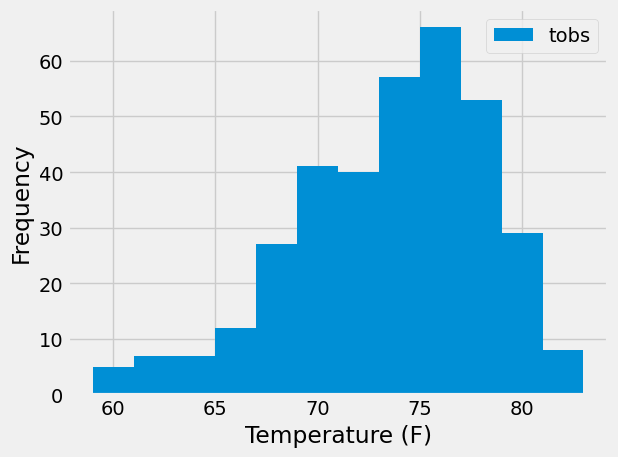

In [247]:
#plot the results as a histogram

df.plot.hist(bins=12)
plt.xlabel("Temperature (F)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Close session

In [248]:
# Close Session
session.close()